In [2]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import pickle

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Read your api key environment variable
NEWSAPIKEY = os.getenv("NEWSAPI")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=NEWSAPIKEY)

In [5]:
# # Fetch the Bitcoin news articles
# btc_articles = newsapi.get_everything( q='bitcoin',
#                                       from_param='2020-02-21',
#                                       to='2020-03-19',
#                                       language='en',
#                                       sort_by='relevancy')



In [6]:
# # Fetch the Ethereum news articles
# eth_articles = newsapi.get_everything(q='ethereum',                                      
#                                       from_param='2020-02-21',
#                                       to='2020-03-19',
#                                       language='en',
#                                       sort_by='relevancy')



In [7]:
# ##############################
# ## Area for saving pickles



# with open('btcArticles.pickle', 'wb') as handle:
#     pickle.dump(btc_articles, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('ethArticles.pickle', 'wb') as handle:
#     pickle.dump(eth_articles, handle, protocol=pickle.HIGHEST_PROTOCOL)

# #############################

In [8]:
with open('btcArticles.pickle', 'rb') as handle:
    btc_articles = pickle.load(handle)
with open('ethArticles.pickle', 'rb') as handle:
    eth_articles  = pickle.load(handle)    

print(btc_articles['totalResults'])
print(eth_articles['totalResults'])


3390
746


In [9]:
# Create the Bitcoin sentiment scores DataFrame

btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
btc_df = pd.DataFrame(btc_sentiments)
cols = ["compound", "positive", "negative", "neutral","date", "text"]
btc_df = btc_df[cols]



In [10]:
# Create the ethereum sentiment scores DataFrame


eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
eth_df = pd.DataFrame(eth_sentiments)
cols = ["compound", "positive", "negative", "neutral","date", "text"]
eth_df = eth_df[cols]

eth_df.head()

,compound,positive,negative,neutral,date,text
0,-0.2944,0.074,0.078,0.847,2020-03-12,Bitcoin is going through a remarkably bad day....
1,0.0000,0.000,0.000,1.000,2020-03-06,If a player picks up an item in an online vide...
2,-0.1027,0.000,0.035,0.965,2020-03-17,"Coinbase Card, the Visa debit card that lets y..."
3,0.3182,0.112,0.066,0.822,2020-02-27,When it comes to celebrities shilling shady in...
4,0.4019,0.068,0.000,0.932,2020-03-05,The South Korean National Assembly passed new ...


In [11]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.379747,0.077895,0.020632,0.901474
std,0.341745,0.031936,0.043071,0.055929
min,-0.510600,0.000000,0.000000,0.730000
25%,0.267050,0.067000,0.000000,0.871000
50%,0.507000,0.068000,0.000000,0.932000
75%,0.507000,0.079500,0.021000,0.932000
max,0.789300,0.137000,0.168000,1.000000


In [12]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.187537,0.074789,0.038053,0.887211
std,0.484717,0.065240,0.046028,0.061730
min,-0.717400,0.000000,0.000000,0.762000
25%,-0.051350,0.022500,0.000000,0.843000
50%,0.340000,0.068000,0.029000,0.899000
75%,0.484650,0.101500,0.063000,0.930000
max,0.895500,0.208000,0.133000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin ( BTC )

Q: Which coin had the highest compound score?

A: Ethereum ( ETH )

Q. Which coin had the highest positive score?

A: Ethereum (ETH )

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [13]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [14]:
# Expand the default stopwords list if necessary
stopWords = set(stopwords.words('english'))


In [15]:
# Complete the tokenizer function
def tokenizer(dictArticles):
    """Tokenizes text."""
    # Create a list of the words
    # Convert the words to lowercase
    # Remove the punctuation
    # Remove the stop words
    # Lemmatize Words into root words
    
    ###### Convert all articles into a list of all the words( lower case )
    listOfArticles = []
    for art in dictArticles['articles']:
        if type(art['content']) != type(None):
            sentences = art['content'].split(' ')
            #for sentence in sentences:
            listOfArticles.append(sentences)
    ####### Stop Word removal
    
    listOfArticles_swRemoved = []
    for art in listOfArticles:
        art_sw = [word for word in art if word not in stopWords]
        listOfArticles_swRemoved.append(art_sw)
        #totalWords_swRemoved = [word for word in listOfArticles if word not in stopWords]
    
    ### Lem
    lemmatizer = WordNetLemmatizer()
    listOfArticles_lem = []
    for art in listOfArticles_swRemoved:
        art_lem = [lemmatizer.lemmatize(word) for word in art]
        listOfArticles_lem.append(art_lem)
    
    tokens = listOfArticles_lem    
    
    return tokens


In [16]:
# Create a new tokens column for bitcoin
btc_tokens = tokenizer(btc_articles)
btc_df['tokens'] = btc_tokens
btc_df.head()

,compound,positive,negative,neutral,date,text,tokens
0,-0.2944,0.074,0.078,0.847,2020-03-12,Bitcoin is going through a remarkably bad day....,"[Bitcoin, going, remarkably, bad, day., It, tu..."
1,0.0000,0.000,0.000,1.000,2020-03-04,After launching two cryptocurrency-oriented sm...,"[After, launching, two, cryptocurrency-oriente..."
2,-0.5106,0.103,0.168,0.730,2020-03-04,Indias Supreme Court on Wednesday overturned c...,"[Indias, Supreme, Court, Wednesday, overturned..."
3,0.5070,0.068,0.000,0.932,2020-03-19,Our robot colleague Satoshi Nakaboto writes ab...,"[Our, robot, colleague, Satoshi, Nakaboto, wri..."
4,0.4939,0.085,0.000,0.915,2020-03-16,Former Coinbase chief legal officer Brian Broo...,"[Former, Coinbase, chief, legal, officer, Bria..."


In [17]:
# Create a new tokens column for ethereum
eth_tokens = tokenizer(eth_articles)
eth_df['tokens'] = eth_tokens
eth_df.head()

,compound,positive,negative,neutral,date,text,tokens
0,-0.2944,0.074,0.078,0.847,2020-03-12,Bitcoin is going through a remarkably bad day....,"[Bitcoin, going, remarkably, bad, day., It, tu..."
1,0.0000,0.000,0.000,1.000,2020-03-06,If a player picks up an item in an online vide...,"[If, player, pick, item, online, video, game,,..."
2,-0.1027,0.000,0.035,0.965,2020-03-17,"Coinbase Card, the Visa debit card that lets y...","[Coinbase, Card,, Visa, debit, card, let, spen..."
3,0.3182,0.112,0.066,0.822,2020-02-27,When it comes to celebrities shilling shady in...,"[When, come, celebrity, shilling, shady, initi..."
4,0.4019,0.068,0.000,0.932,2020-03-05,The South Korean National Assembly passed new ...,"[The, South, Korean, National, Assembly, passe..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
# Generate the Bitcoin N-grams where N=2
bigram_btc_counts = Counter(ngrams([item for sublist in btc_tokens for item in sublist], n=2))
bigram_btc_counts.most_common(20)

[(('chars]', 'Our'), 14),
 (('Our', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'Satoshi'), 14),
 (('Satoshi', 'Nakaboto'), 14),
 (('Nakaboto', 'writes'), 14),
 (('writes', 'Bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day.\r\nWelcome'), 14),
 (('day.\r\nWelcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'Bitcoin'), 14),
 (('Bitcoin', 'Today,'), 14),
 (('Today,', 'I,'), 14),
 (('I,', 'Satoshi'), 14),
 (('Satoshi', 'Nakaboto,'), 14),
 (('Nakaboto,', 'tell'), 14),
 (('tell', 'whats'), 14),
 (('whats', 'going'), 14),
 (('going', 'Bitcoin'), 14)]

In [20]:
# Generate the Ethereum N-grams where N=2
bigram_eth_counts = Counter(ngrams([item for sublist in eth_tokens for item in sublist], n=2))
bigram_eth_counts.most_common(20)

[(('chars]', 'The'), 4),
 (('fell', '$6,000'), 3),
 (('$6,000', 'first'), 3),
 (('first', 'time'), 3),
 (('debit', 'card'), 2),
 (('chars]', 'Reuters\r\nBitcoin'), 2),
 (('Reuters\r\nBitcoin', 'tanked'), 2),
 (('tanked', 'Thursday'), 2),
 (('Thursday', 'fell'), 2),
 (('time', 'since'), 2),
 (('since', 'May'), 2),
 (('May', 'amid'), 2),
 (('amid', 'larger'), 2),
 (('larger', 'global'), 2),
 (('global', 'market'), 2),
 (('market', 'sell-off'), 2),
 (('sell-off', 'investor'), 2),
 (('investor', 'panic'), 2),
 (('panic', 'spread'), 2),
 (('spread', 'coronavirus.\xa0\r\nThe'), 2)]

In [21]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [32]:
# Get the top 10 words for Bitcoin
btc_tokens_flattened = [item for sublist in btc_tokens for item in sublist]
token_count(btc_tokens_flattened,N=10)

[('Bitcoin', 44),
 ('Satoshi', 28),
 ('chars]', 19),
 ('going', 15),
 ('BTC', 15),
 ('Our', 14),
 ('robot', 14),
 ('colleague', 14),
 ('Nakaboto', 14),
 ('writes', 14)]

In [31]:
# Get the top 10 words for Ethereum
eth_tokens_flattened = [item for sublist in eth_tokens for item in sublist]
token_count(eth_tokens_flattened,N=10)

[('chars]', 19),
 ('The', 8),
 ('cryptocurrency', 8),
 ('new', 6),
 ('first', 5),
 ('fell', 5),
 ('company', 4),
 ('Bitcoin', 3),
 ('…', 3),
 ('Coinbase', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [41]:
eth_str_tokens = " ".join(eth_tokens_flattened)
btc_str_tokens = " ".join(btc_tokens_flattened)

wceth = WordCloud().generate(eth_str_tokens)
wcbtc = WordCloud().generate(btc_str_tokens)



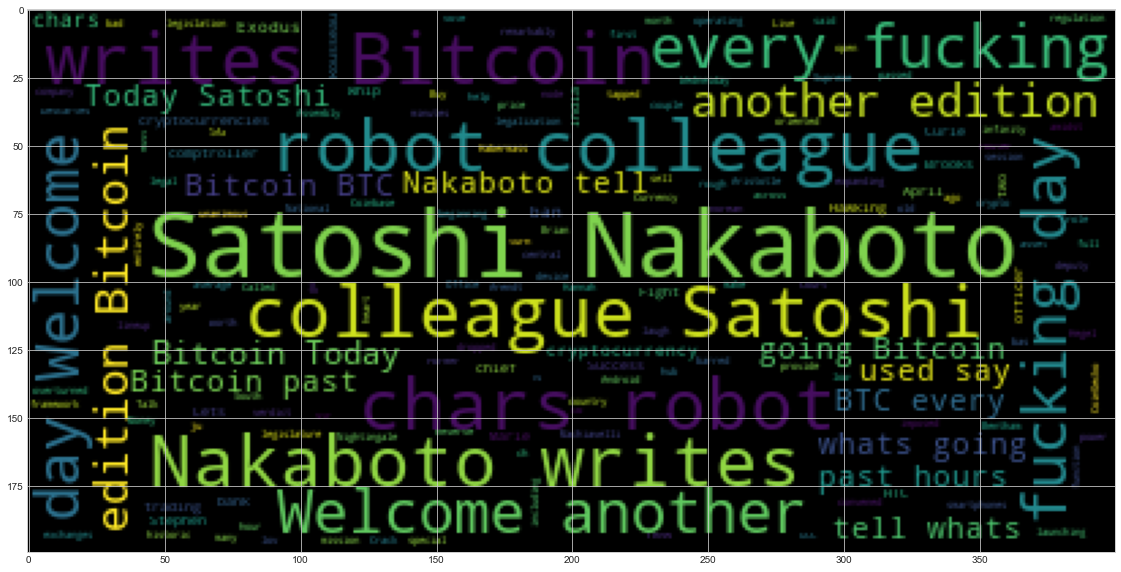

In [44]:
# Generate the Bitcoin word cloud
plt.imshow(wcbtc)

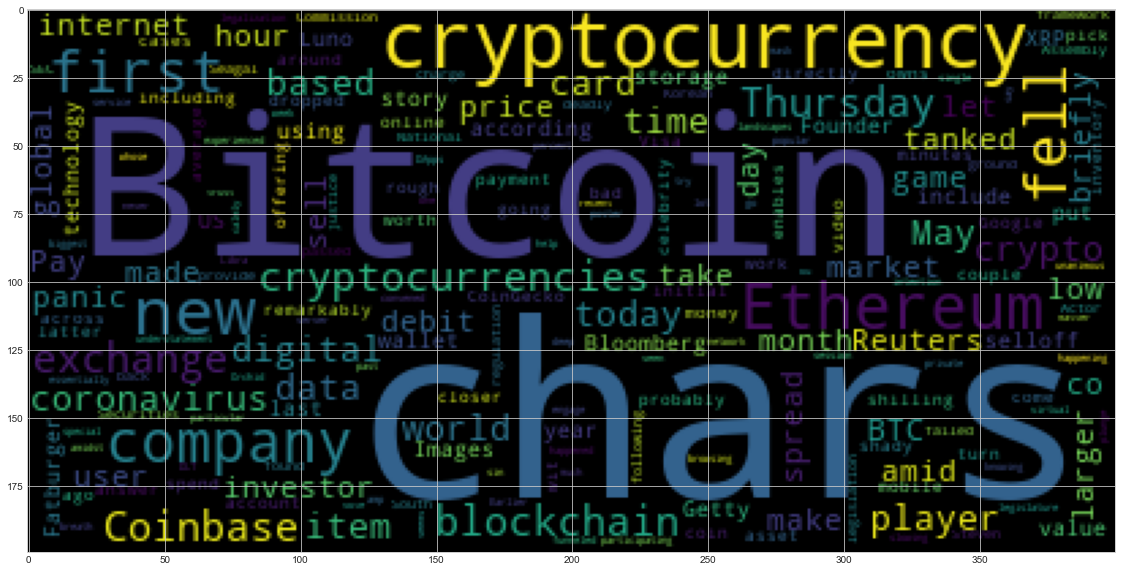

In [45]:
# Generate the Ethereum word cloud
plt.imshow(wceth)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [89]:
import spacy
from spacy import displacy

In [90]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [91]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [92]:
# Concatenate all of the bitcoin text together
btc_str_tokens

'Bitcoin going remarkably bad day. It turn asset rough month including cryptocurrencies. A couple hour ago, average price BTC dropped 15% 20 minutes.\r\nOn CoinGecko, 1 BTC worth around $7,250 across … [+1146 chars] After launching two cryptocurrency-oriented smartphones, HTC Exodus 1 Exodus 1s, company expanding lineup entirely new device: 5G router function full Bitcoin node.\xa0\r\nCalled HTC Exodus 5G hub, Android-bas… [+2230 chars] Indias Supreme Court Wednesday overturned\xa0central bank two-year-old ban cryptocurrency trading country many said historic verdict.\r\nThe Reserve Bank India imposed ban cryptocurrency trading April 2018 barred ban… [+1336 chars] Our robot colleague Satoshi Nakaboto writes Bitcoin every fucking day.\r\nWelcome another edition Bitcoin Today, I, Satoshi Nakaboto, tell whats going Bitcoin past 24 hours. As Descartes used say: Your heart must go … [+2896 chars] Former Coinbase chief legal officer Brian Brooks tapped chief operating officer first deputy co

In [93]:
# Run the NER processor on all of the text
btc_nlp_doc = nlp(btc_str_tokens)

# Add a title to the document
## AH! i was unable to find an example or how to do this online!

In [32]:
# Render the visualization
displacy.render(btc_nlp_doc, style='ent')

In [33]:
# List all Entities
for ent in btc_nlp_doc.ents:
    print(f"{ent.text} {ent.label_}")

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [34]:
# Concatenate all of the bitcoin text together
eth_str_tokens

'President Trump tweeted insults at Twitter again this morning, but this time Jack took the conversation off platform to the White House. In other news, a controversial Census question creates some strange bedfellows, and a "blockchain bandit" is pilfering mil… [+1705 chars]After announcing that they were launching a managed blockchain service late last year, Amazon Web Services is now opening that service up for general availability.\r\nIt was only about five months ago that AWS chief executive Andy Jassy announced that the compa… [+1220 chars]Captain Kirk and neo-Dadaists. Repugnant markets and legendary cryptographers. “Digital couture” auctioned by CryptoKitties developers. Distributed autonomous art organizations. A keynote speech looking back from 2047 at the near-apocalypse of 2026, from whic… [+5265 chars]So long as cryptocurrency exists, so too will the extraordinarylengths to which thieves will go to try to steal it. Unfortunately, that also includes preying on weak private k

In [116]:
# Run the NER processor on all of the text
eth_nlp_doc = nlp(eth_str_tokens)

# Add a title to the document
## AH! i was unable to find an example or how to do this online!

In [122]:
# Render the visualization
displacy.render(eth_nlp_doc, style='ent')

In [121]:
# List all Entities
for ent in eth_nlp_doc.ents:
    print(f"{ent.text} {ent.label_}")

Bitcoin GPE
A couple hour ago TIME
BTC ORG
15% PERCENT
20 minutes TIME
CoinGecko PRODUCT
1 CARDINAL
around $7,250 MONEY
Visa ORG
Securities Exchange Commission ORG
Steven Seagal PERSON
Thursday DATE
SEC ORG
2018 DATE
The South Korean National Assembly ORG
today DATE
past week DATE
2020 CARDINAL
blockchain GPE
DApps &amp ORG
DLT ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
5,705.31 MONEY
Bloomberg ORG
Reuters
 ORG
Thursday DATE
6,000 MONEY
first ORDINAL
May DATE
5,705.31 MONEY
Bloomberg ORG
7 CARDINAL
one-day DATE
months DATE
Bitcoin GPE
21 percent PERCENT
last 24 hours TIME
Earlier today TIME
Bitcoin GPE
6,000 MONEY
Libra Association ORG
Andreessen Horowitz Coinbase PERSON
today DATE
50 CARDINAL
The Celo Foundation ORG
‘Alliance For Prosperity’ ORG
Camila Russo PERSON
Vitalik Buterin Ethereum PERSON
Jul PERSON
February DATE
26 CARDINAL
2020 CARDINAL
7 min QUANTITY
IRS ORG
Thursday DATE
26% PERCENT
seven years DATE
5,700 MONEY
Opera PERSON
first ORDINAL
US GPE
Scand